In [1]:
import re
import os
import json
import numpy as np
import os.path as op
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from matplotlib.patches import Patch
from sklearn.metrics import mean_absolute_error

In [2]:
INPDIR = "../models/DeepHF/SpCas9HF1LC/"
files = list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2]))
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("_")[1].replace(".json", "")
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
scc_train_HF1 = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents]
scc_test_HF1 = [spearmanr(a["y"], a["y_hat"])[0]  for a in contents]
mstd_train_HF1 = [np.median(a["y_hat_std_T"])  for a in contents]
mstd_test_HF1 = [np.median(a["y_hat_std"])  for a in contents]

In [3]:
INPDIR = "../models/DeepHF/eSpCas9LC/"
files = list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2]))
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("__")[1].replace("_.json", "")
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
scc_train_e = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents]
scc_test_e = [spearmanr(a["y"], a["y_hat"])[0]  for a in contents]
mstd_train_e = [np.median(a["y_hat_std_T"])  for a in contents]
mstd_test_e = [np.median(a["y_hat_std"])  for a in contents]

/home/bakirillov/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bakirillov/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bakirillov/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/bakirillov/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/bakirillov/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [4]:
INPDIR = "../models/DeepHF/WtLC/"
files = list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2]))
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("_")[1]
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
scc_train_wt = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents]
scc_test_wt = [spearmanr(a["y"], a["y_hat"])[0]  for a in contents]
mstd_train_wt = [np.median(a["y_hat_std_T"])  for a in contents]
mstd_test_wt = [np.median(a["y_hat_std"])  for a in contents]

In [23]:
INPDIR = "../models/WeissmanLC/"
files = list(filter(lambda x: ".json" in x, [a for a in os.walk(INPDIR)][0][2]))
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("_")[1]
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
#scc_train_weis = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents]
scc_test_weis = [spearmanr(a["y"], a["y_hat"])[0]  for a in contents]
#mstd_train_weis = [np.median(a["y_hat_std_T"])  for a in contents]
mstd_test_weis = [np.median(a["y_hat_std"])  for a in contents]

In [26]:
files

['Cpf1OfftargetsLC_cnn_elbo_0.4_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.1_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.3_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.2_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.5_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.9_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.75_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.05_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.99_.json',
 'Cpf1OfftargetsLC_cnn_elbo_0.95_.json']

In [40]:
INPDIR = "../models/Cpf1OfftargetsLC/"
files = list(filter(lambda x: ".json" in x and "cnn_elbo" in x, [a for a in os.walk(INPDIR)][0][2]))
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("_")[3]
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
#scc_train_weis = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents]
scc_test_cindel = [spearmanr(a["y"], a["y_hat"])[0]  for a in contents][0:10]
#mstd_train_weis = [np.median(a["y_hat_std_T"])  for a in contents]
mstd_test_cindel = [np.median(a["y_hat_std"])  for a in contents]

In [6]:
INPDIR = "../results/LC/DeepCpf1Kim/"
files = list(
    filter(
        lambda x: ".json" in x and "cnn_elbo" in x, 
        [a for a in os.walk(INPDIR)][0][2]
    )
)
ordered = list(
    sorted(
        files, 
        key=lambda x: x.split("_")[2].replace(".json", "")
    )
)
contents = [json.loads(open(op.join(INPDIR, a), "r").read()) for a in ordered]
scc_train_cpf = [spearmanr(a["y_T"], a["y_hat_T"])[0]  for a in contents][0:10]
scc_test_cpf = [spearmanr(a["y_H1"], a["y_hat_H1"])[0]  for a in contents][0:10]
scc_test_cpf2 = [spearmanr(a["y_H2"], a["y_hat_H2"])[0]  for a in contents][0:10]
scc_test_cpf3 = [spearmanr(a["y_H3"], a["y_hat_H3"])[0]  for a in contents][0:10]
mstd_train_cpf = [np.median(a["y_hat_std_H1"]) for a in contents]
mstd_test_cpf = [np.median(a["y_hat_std_H1"]) for a in contents]
mstd_train_cpf2 = [np.median(a["y_hat_std_H2"]) for a in contents]
mstd_test_cpf2 = [np.median(a["y_hat_std_H2"]) for a in contents]
mstd_train_cpf3 = [np.median(a["y_hat_std_H3"]) for a in contents]
mstd_test_cpf3 = [np.median(a["y_hat_std_H3"]) for a in contents]

In [7]:
proportions = np.array(
    [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9, 0.95, 0.99]
)

In [15]:
sizes = {
    "Wt": int(59254*0.8),
    "eSpCas9": int(59254*0.8),
    "SpCas9HF1": int(59254*0.8),
    "Cpf1": int(15000*0.8),
    "Cpf1_offtarget": int(1596*0.9)
}

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3

In [41]:
ordered

['CpfOfftargets_cnn_elbo_0.05_.json',
 'CpfOfftargets_cnn_elbo_0.1_.json',
 'CpfOfftargets_cnn_elbo_0.2_.json',
 'CpfOfftargets_cnn_elbo_0.3_.json',
 'CpfOfftargets_cnn_elbo_0.4_.json',
 'CpfOfftargets_cnn_elbo_0.5_.json',
 'CpfOfftargets_cnn_elbo_0.75_.json',
 'CpfOfftargets_cnn_elbo_0.9_.json',
 'CpfOfftargets_cnn_elbo_0.95_.json',
 'CpfOfftargets_cnn_elbo_0.99_.json']

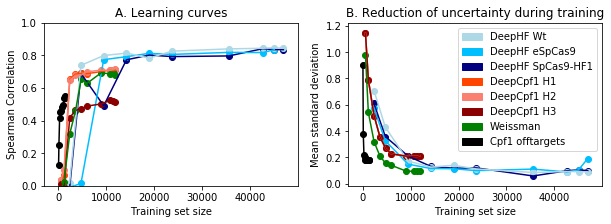

In [42]:
plt.subplot(1,2,1)
plt.scatter(proportions*sizes["SpCas9HF1"], scc_test_HF1, c="navy")
plt.plot(proportions*sizes["SpCas9HF1"], scc_test_HF1, c="navy")
plt.scatter(proportions*sizes["eSpCas9"], scc_test_e, c="deepskyblue")
plt.plot(proportions*sizes["eSpCas9"], scc_test_e, c="deepskyblue")
plt.scatter(proportions*sizes["Wt"], scc_test_wt, c="lightblue")
plt.plot(proportions*sizes["Wt"], scc_test_wt, c="lightblue")
plt.scatter(proportions*sizes["Cpf1"], scc_test_cpf, c="orangered")
plt.plot(proportions*sizes["Cpf1"], scc_test_cpf, c="orangered")
plt.scatter(proportions*sizes["Cpf1"], scc_test_cpf2, c="salmon")
plt.plot(proportions*sizes["Cpf1"], scc_test_cpf2, c="salmon")
plt.scatter(proportions*sizes["Cpf1"], scc_test_cpf3, c="darkred")
plt.plot(proportions*sizes["Cpf1"], scc_test_cpf3, c="darkred")
plt.scatter(proportions*sizes["Cpf1"], scc_test_weis, c="green")
plt.plot(proportions*sizes["Cpf1"], scc_test_weis, c="green")
plt.scatter(proportions*sizes["Cpf1_offtarget"], scc_test_cindel, c="black")
plt.plot(proportions*sizes["Cpf1_offtarget"], scc_test_cindel, c="black")
plt.ylim((0,1))
plt.title("A. Learning curves")
plt.xlabel("Training set size")
plt.ylabel("Spearman Correlation")
plt.subplot(1,2,2)
plt.scatter(proportions*sizes["SpCas9HF1"], mstd_test_HF1, c="navy")
plt.plot(proportions*sizes["SpCas9HF1"], mstd_test_HF1, c="navy")
plt.scatter(proportions*sizes["eSpCas9"], mstd_test_e, c="deepskyblue")
plt.plot(proportions*sizes["eSpCas9"], mstd_test_e, c="deepskyblue")
plt.scatter(proportions*sizes["Wt"], mstd_test_wt, c="lightblue")
plt.plot(proportions*sizes["Wt"], mstd_test_wt, c="lightblue")
plt.scatter(proportions*sizes["Cpf1"], mstd_test_cpf, c="orangered")
plt.plot(proportions*sizes["Cpf1"], mstd_test_cpf, c="orangered")
plt.scatter(proportions*sizes["Cpf1"], mstd_test_cpf2, c="salmon")
plt.plot(proportions*sizes["Cpf1"], mstd_test_cpf2, c="salmon")
plt.scatter(proportions*sizes["Cpf1"], mstd_test_cpf3, c="darkred")
plt.plot(proportions*sizes["Cpf1"], mstd_test_cpf3, c="darkred")
plt.scatter(proportions*sizes["Cpf1"], mstd_test_weis, c="green")
plt.plot(proportions*sizes["Cpf1"], mstd_test_weis, c="green")
plt.scatter(proportions*sizes["Cpf1_offtarget"], mstd_test_cindel, c="black")
plt.plot(proportions*sizes["Cpf1_offtarget"], mstd_test_cindel, c="black")
plt.xlabel("Training set size")
plt.ylabel("Mean standard deviation")
plt.title("B. Reduction of uncertainty during training")
plt.legend(
    loc="best", handles=[
        Patch(color="lightblue", label="DeepHF Wt"),
        Patch(color="deepskyblue", label="DeepHF eSpCas9"),
        Patch(color="navy", label="DeepHF SpCas9-HF1"),
        Patch(color="orangered", label="DeepCpf1 H1"),
        Patch(color="salmon", label="DeepCpf1 H2"),
        Patch(color="darkred", label="DeepCpf1 H3"),
        Patch(color="green", label="Weissman"),
        Patch(color="black", label="Cpf1 offtargets")
    ]
)
plt.show()

In [11]:
import pandas as pd

In [14]:
u = pd.read_csv("../results/Chr22/Cas9/_models_DeepHF_Wt_cnn_elbo59.tsv", index_col=0).head()

In [17]:
u.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [24]:
del u["6"]

In [26]:
u.columns = ["start", "sequence", "strand", "mean", "variance"]

In [29]:
print(u.to_latex())

\begin{tabular}{lrllrr}
\toprule
{} &  start &                 sequence & strand &      mean &  variance \\
\midrule
0 &   7403 &  GTGTGTGGACAGATCAGGAGGGG &      - &  0.925986 &  0.011313 \\
1 &  11867 &  CTAGACAGAAAAGGAAAGGGGGG &      - &  0.925975 &  0.011333 \\
2 &   6718 &  GCAGAGCCAAAGCTGAACCCAGG &      + &  0.925880 &  0.011435 \\
3 &   4888 &  CTGGGAGCTCAGGCATCCCAGGG &      - &  0.925802 &  0.011466 \\
4 &   3446 &  CAGGAGCTCAAGACCAGTGTGGG &      - &  0.925743 &  0.011290 \\
\bottomrule
\end{tabular}

